In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("./data/Kickstarter_merged.csv")

In [3]:
df.columns

Index(['id', 'name', 'description', 'description_story', 'description_risks',
       'rewards', 'category', 'pledged', 'goal', 'deadline', 'location',
       'state', 'faq_count', 'update_count', 'backers_count', 'is_starrable',
       'spotlight', 'staff_pick', 'video', 'creator_name', 'creator_url',
       'url', 'created_at', 'published_at', 'launched_at', 'link'],
      dtype='object')

<AxesSubplot:xlabel='backers_count', ylabel='pledged'>

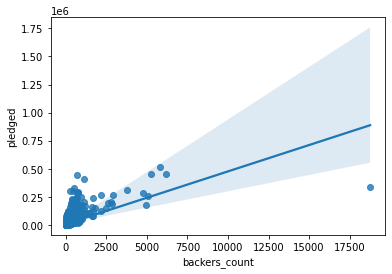

In [11]:
# check if there is a relationship between backers_count and pledged
#sns.lineplot(data=df, x='backers_count',y='pledged')

sns.regplot(data=df, x='backers_count', y='pledged')

There is a linear relationship between backers_count and pledged. Outlier at the end.

<AxesSubplot:xlabel='backers_count', ylabel='state'>

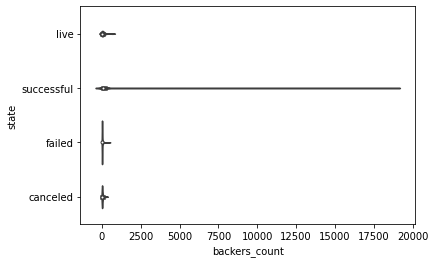

In [12]:
# violinplot
sns.violinplot(data=df, x="backers_count", y="state")

In [16]:
df['backers_count'].sort_values()

2131        0
1829        0
1702        0
1695        0
1690        0
        ...  
812      5061
83       5248
350      5823
734      6177
598     18768
Name: backers_count, Length: 2132, dtype: int64

In [5]:
base = "/Users/ivankoh/Downloads/kickstarter data/"
filepaths = [base + f for f in os.listdir(base) if f.endswith('.csv')]
df_1 = pd.concat(map(pd.read_csv, filepaths))
df_2 = df_1.drop_duplicates(subset=['id'])
df_2['main_url'] = df_2['urls'].apply(lambda x: eval(x)['web']['project'])
print(len(df_1))
print(len(df_2))

392244
203510


/var/folders/dq/33rpc0cx4f54t0vx2cdcgczr0000gn/T/ipykernel_10683/1863032995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['main_url'] = df_2['urls'].apply(lambda x: eval(x)['web']['project'])


0        869639785
1       1511883132
2         43198687
3       1897699884
4        967845967
           ...    
3655    1318307476
3656    2079254065
3657    1461455268
3658    1360935499
3659    1335709529
Name: id, Length: 392244, dtype: int64

In [3]:
base = "/Users/ivankoh/Downloads/kickstarter data wy/"
filepaths = [base + f for f in os.listdir(base) if f.endswith('.xlsx')]
df = pd.concat(map(pd.read_excel, filepaths))
#df_1 = df.drop_duplicates(subset=['id'])
#df_1['main_url'] = df_1['urls'].apply(lambda x: eval(x)['web']['project'])
print(len(df))
#print(len(df_1))

5834


In [6]:
print(len(df))
print(pd.isnull(df['description_story']).sum())
print(pd.isnull(df['description_risks']).sum())
print(pd.isnull(df['rewards']).sum())
print(pd.isnull(df['updateCount']).sum())
print(df['Status'].value_counts())

5834
2335
2510
361
361
successful    4248
failed         694
live           505
canceled        26
Name: Status, dtype: int64


In [14]:
df['Link-href']
df_2['urls'] = df_2['urls'].apply(lambda x: eval(x)['web']['project'])

/var/folders/dq/33rpc0cx4f54t0vx2cdcgczr0000gn/T/ipykernel_10683/2972390848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['urls'] = df_2['urls'].apply(lambda x: eval(x)['web']['project'])


In [24]:
df['Link-href'] = df['Link-href'].apply(lambda x: str(x)[:str(x).find("?ref")])
df_2['urls'] = df_2['urls'].apply(lambda x: str(x)[:str(x).find("?ref")])
df.merge(df_2, left_on="Link-href", right_on="urls")

/var/folders/dq/33rpc0cx4f54t0vx2cdcgczr0000gn/T/ipykernel_10683/1811708439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['urls'] = df_2['urls'].apply(lambda x: str(x)[:str(x).find("?ref")])


,web-scraper-order,web-scraper-start-url,Title,Description,Status,Pledged-Amount,Funded-percent,Time left,Sphere,Location,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,main_url
0,1663816378-503,https://www.kickstarter.com/discover/advanced?...,The Sad Man Kickstarter,"A kick in the teeth starter, for the sad man.",successful,NaN,5700.000000,NaN,NaN,NaN,...,True,False,successful,1447888249,1.000000,https://www.kickstarter.com/projects/129545930...,1.000000,57.000000,international,https://www.kickstarter.com/projects/129545930...
1,1663816385-504,https://www.kickstarter.com/discover/advanced?...,Double Down V7,Double Down wants to make the most extravagant...,successful,NaN,110.937500,NaN,NaN,NaN,...,True,False,successful,1442808013,1.000000,https://www.kickstarter.com/projects/188304643...,1.000000,71.000000,international,https://www.kickstarter.com/projects/188304643...
2,1663816390-505,https://www.kickstarter.com/discover/advanced?...,Tiny Tools of Turmoil: Mini Enamel Pins,A set of tiny pins revolved around the turmoil...,successful,NaN,153.000000,NaN,NaN,NaN,...,True,False,successful,1620003606,1.000000,https://www.kickstarter.com/projects/thefairyg...,1.000000,612.000000,international,https://www.kickstarter.com/projects/thefairyg...
3,1663816395-506,https://www.kickstarter.com/discover/advanced?...,VF-124 Gunfighters Commemorative Challenge Coin,All donations go towards the benefit of the VF...,successful,NaN,102.105263,NaN,NaN,NaN,...,True,False,successful,1410381010,1.000000,https://www.kickstarter.com/projects/190131547...,1.000000,970.000000,domestic,https://www.kickstarter.com/projects/190131547...
4,1663816400-507,https://www.kickstarter.com/discover/advanced?...,Becoming Slovenian,An American artist in Slovenia interprets live...,successful,NaN,100.857143,NaN,NaN,NaN,...,True,False,successful,1333339144,1.000000,https://www.kickstarter.com/projects/interstat...,1.000000,3530.000000,international,https://www.kickstarter.com/projects/interstat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,1663866369-5868,https://www.kickstarter.com/discover/advanced?...,Freezy Freakies gloves - Back from the '80s. N...,Those color-changing gloves from the '80s are ...,successful,NaN,606.180000,NaN,NaN,NaN,...,True,True,successful,1423334180,1.000000,https://www.kickstarter.com/projects/hansr/fre...,1.000000,60618.000000,international,https://www.kickstarter.com/projects/hansr/fre...
4406,1663866379-5870,https://www.kickstarter.com/discover/advanced?...,Wu & Y: Art on Activewear Shorts,The first shorts to combine breath-taking art ...,successful,NaN,787.600000,NaN,NaN,NaN,...,True,True,successful,1467431940,1.000000,https://www.kickstarter.com/projects/168269830...,1.000000,39380.000000,international,https://www.kickstarter.com/projects/168269830...
4407,1663866400-5874,https://www.kickstarter.com/discover/advanced?...,The Bicycle Wrap Skirt | Function + Style,Sustainably made in the USA with hidden fasten...,successful,NaN,193.152381,NaN,NaN,NaN,...,True,True,successful,1435291143,1.000000,https://www.kickstarter.com/projects/192051740...,1.000000,20281.000000,international,https://www.kickstarter.com/projects/192051740...
4408,1663866406-5875,https://www.kickstarter.com/discover/advanced?...,Takaokami - Rainwear for the urban life style,Feminine and bike friendly rainwear designed f...,successful,NaN,101.238196,NaN,NaN,NaN,...,True,True,successful,1429308064,0.152188,https://www.kickstarter.com/projects/947503148...,0.144084,29042.660059,international,https://www.kickstarter.com/projects/947503148...


In [25]:
len(df)

5834